# Survival Analysis

## 1. Introduction

In this module, we will learn about an important, yet under-rated (in computer science) method called survival analysis.
In classification, we were interested in studying how different features could be used to predict a binary (or multi-level) outcome. For instance, we used several features related to the households to predict if their yearly income is above or below 50k. Sometimes though, we are interested in studying how those features affect the time it takes for an event to occur. For instance, we might be interested in knowing how long it takes for a household to reach a 50k yearly income. Reaching the 50k yearly income is an event. We can then use the features related to the households to study which features would be more associated with the time it takes for the households to reach the 50k yearly income level. In this case, classification is useful to determine if the event would occur (at all) rather than determining how long it takes for the event to occur. For modeling time to event, we use survival analysis.

## 2. Survival Time

Survival analysis is used to analyze data in which the time until the event is of interest. The response is often referred to as a failure time or event time. Some examples of failure time:

• Time until tumor recurrence

• Time until cardiovascular death after some treatment intervention

• Time until AIDS for HIV patients

• Time until a machine part fails

In survival analysis we intend to estimate the probability of surviving beyond a specified time. For instance, we may be interested to know how likely it is for a kidney transplant to survive (not fail- the event) one year after the transplant. Or perhaps, we may want to know how likely it is for a customer to discontinue service 1 year after her/ his first transaction. These probabilities can be estimated using survival analysis.

### 2.1. Censoring

The survival time is usually continuous (hours, days, moths, years, …). The length of time starts usually right after a treatment (e.g. kidney transplant) until the event happens (new kidney failure) OR until the treatment is not relevant anymore (patient dies due to causes independent of kidney transplant). Given that in many cases we are not able to observe the subjects (patients, customers, …) during their entire lifespan, the data in survival analysis is often “censored”. That is, for some subjects we may not know the exact time of treatment, for some of them we may not know the exact time of event, and for some subjects we may know neither. In survival analysis, we learn how to deal with situations like these.

**Quiz: If none of the data points were censored, could we use linear regression instead of survival analysis?**

Technically we could use linear regression, however, there may be some issues with running linear regression models over survival data:

* Time to event is restricted to be positive and has a skewed distribution.

* The probability of surviving past a certain point in time may be of more interest than the expected time of event.

* The hazard function, used for regression in survival analysis, can lend more insight into the failure mechanism than linear regression.

Censoring is present when we have some information about a subject’s event time, but we don’t know the exact event time. For the methods we will discuss to be valid, censoring mechanism must be independent of the survival mechanism.

There are generally three reasons why censoring might occur:

* A subject does not experience the event before the study ends
* A person is lost to follow-up during the study period
* A person withdraws from the study

These are all examples of right-censoring. There are different types of right-censoring:

* Fixed type I censoring occurs when a study is designed to end after C years of follow-up. In this case, everyone who does not have an event observed during the course of the study is censored at C years.

* In random type I censoring, the study is designed to end after C years, but censored subjects do not all have the same censoring time. This is the main type of right-censoring we will be concerned with.

* In type II censoring, a study ends when there is a pre-specified number of events.

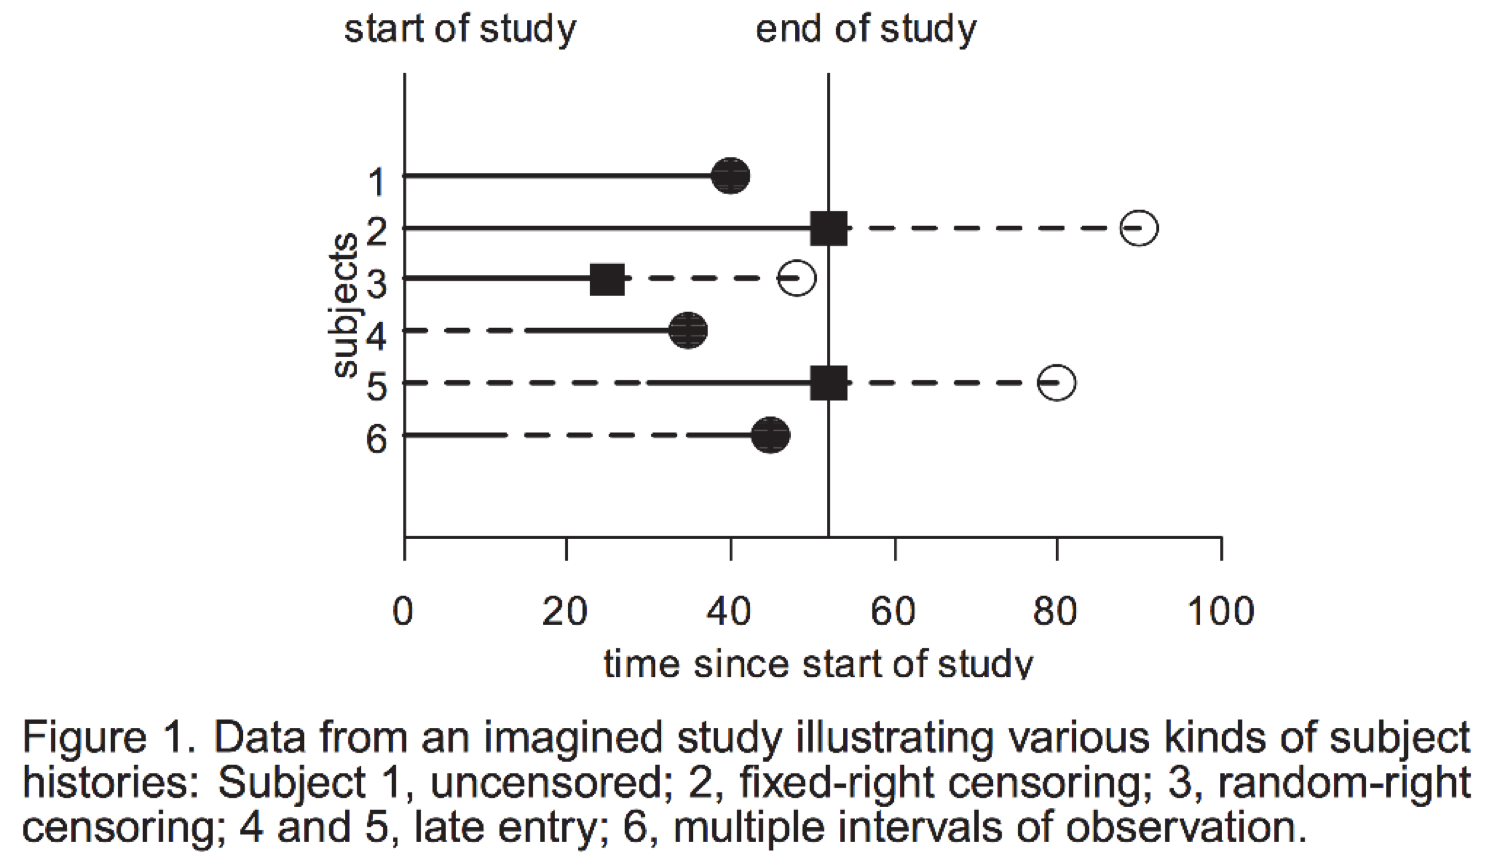

Regardless of the type of censoring, we must assume that it is non-informative about the event; that is, the censoring is caused by something other than the impending failure.

### 2.2. Survival Data

Right-censored survival data consist of two or three components:

1- The survival time of each subject, or the time at which the observation for the subject is censored.

2- Whether or not the subject’s survival time is censored.

3- In most interesting analyses, the values of one or more explanatory variables (covariates) thought to influence survival time. The values of (some) covariates may vary with time.

Late entry and multiple periods of observation introduce complications, but can be handled by focusing on each interval of time during which a subject is under observation, and observing whether the event of interest occurs during that interval.

## 3. The Survival Function

The survival time T may be thought of as a random variable with probability density function (p.d.f.) f(t) and cumulative distribution function (c.d.f.) F(t) = Pr{T =< t}, giving the probability that the event has occurred by duration t. It is often more useful to use the complement of F(t). Which will be:

$S(t)=1−F(t)=Pr(T>t)$

which gives the probability of being surviving just after duration t, or more generally, the probability that the event of interest has not occurred by duration t.

There are several ways to represent the distribution of T: The most familiar is likely the probability-density function.

The simplest parametric model for survival data is the exponential distribution, with probability density function:

$f(t)={λe}^{−λt}$

The exponential distribution has a single rate parameter λ; the interpretation of this parameter is discussed below.

The figure below gives examples of several exponential distributions, with rate parameters λ = 0.5, 1, and 2. It is apparent that the larger the rate parameter, the more the density is concentrated near 0.

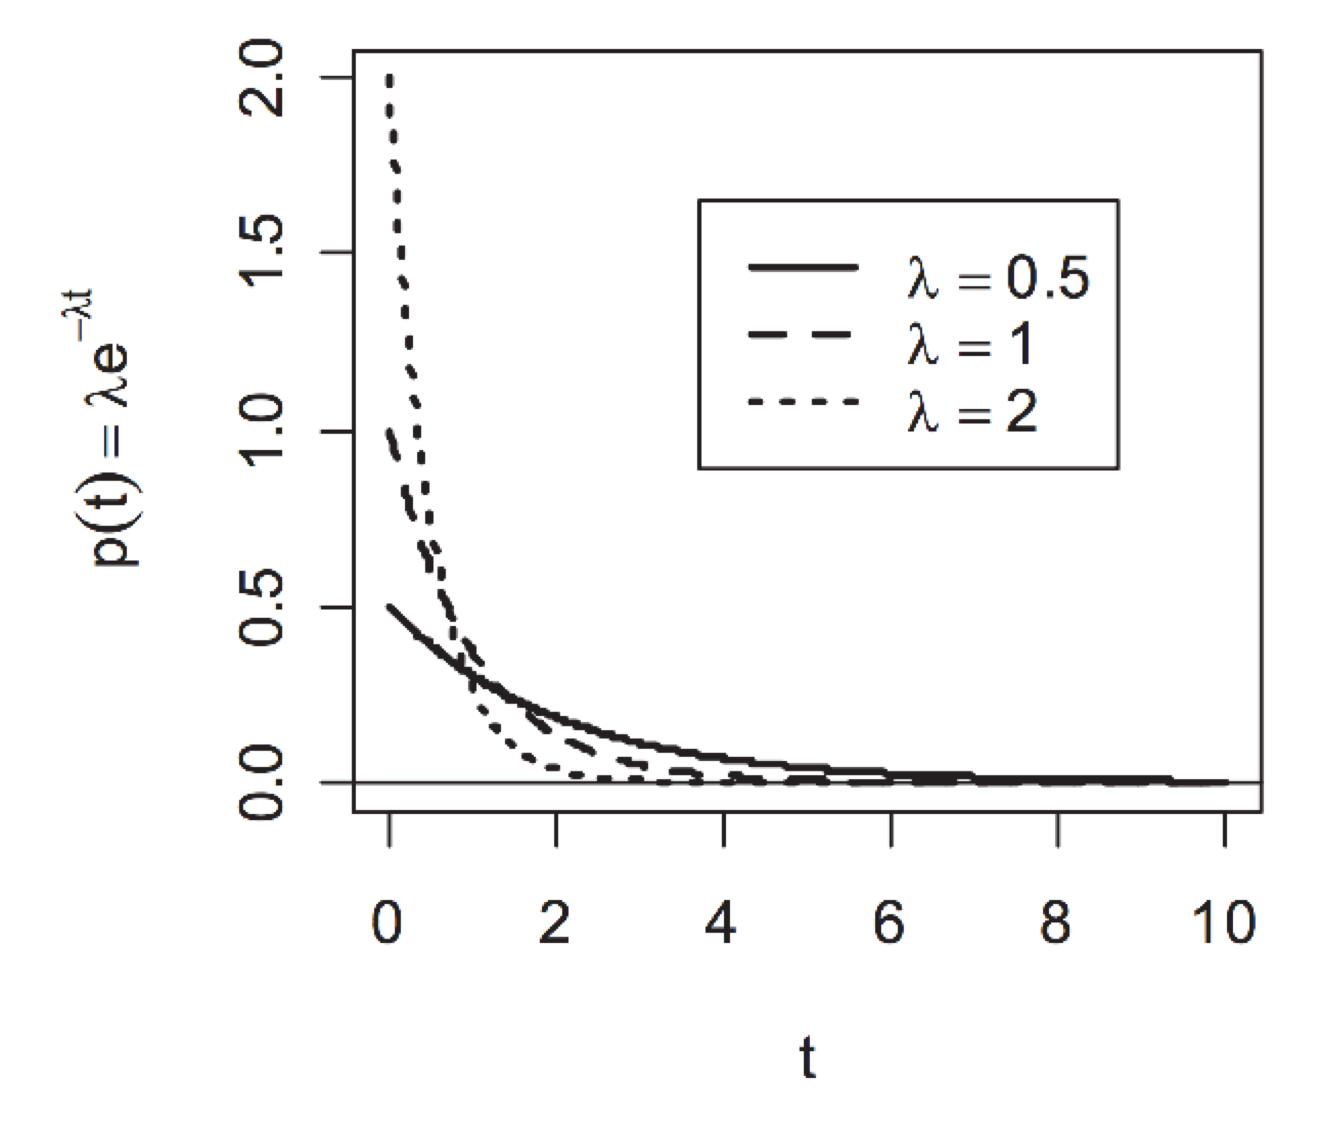

The cumulative distribution function (CDF), can be obtained by:

$F(t)=Pr(T<=t)$

For the exponential distribution we can write:

$F(t)=1-{e}^{−λt}$

As noted earlier, the survival function giving the probability of surviving to time t, is the complement of the cumulative distribution function:

$S(t)=Pr(T>t)=1−F(t)$

Therefore, for the exponential distribution, the survival function is:

$S(t)=1−F(t)=1−(1-{e}^{−λt})={e}^{−λt}$

In other words:

$S(t)=P(event_{time}>t)$, which denotes the probability of surviving at least until time point t.

Properties of S(t):

* S(0) = 1: There is absolute certainty to ‘survive’ t = 0
* S(+∞) = 0: There is absolute certainty to ‘fail’ eventually
* S(t) is a decreasing function

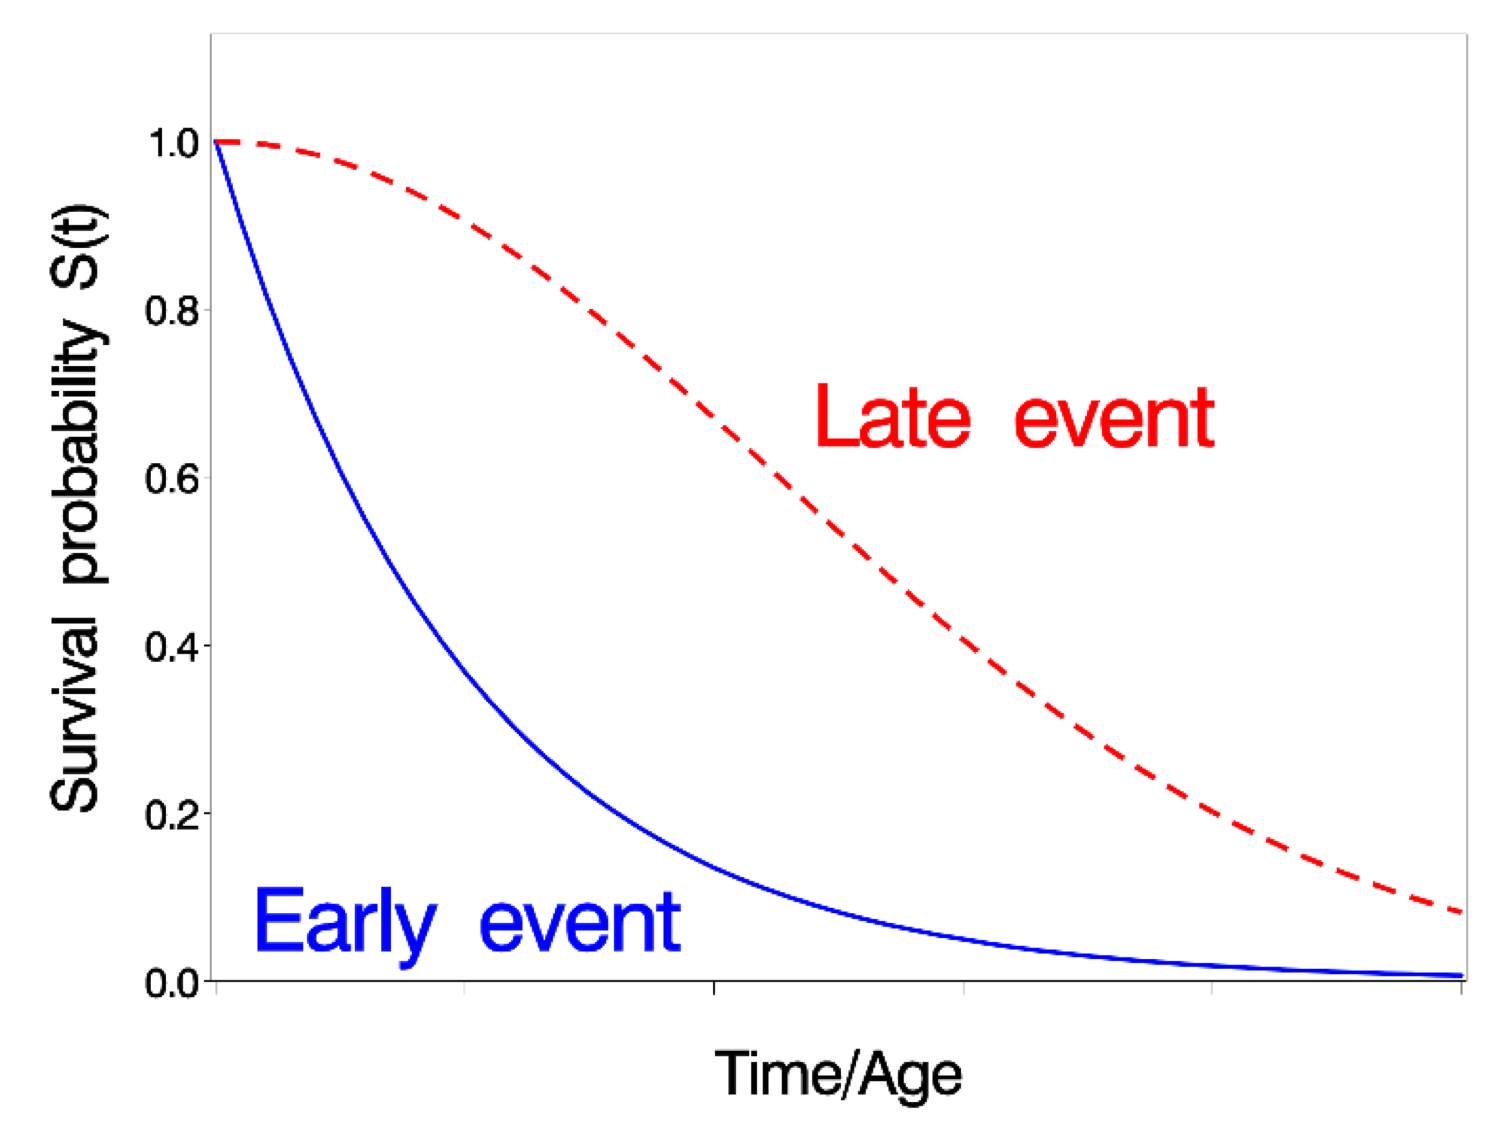

### 3.1. Estimation of the Survival Curve

As $S(t)$ can be interpreted as a proportion, it can be easily estimated by the observed proportion of subjects surviving time point $t$:

$S(t)=P(event_{time}>t)$ can be converted to:

$S(t)=\frac{\text{Number of subjects surviving time t (still alive at time t)}}{\text{Number of all subjects in the data}}$

### 3.2. Kaplan-Meier Survival Curve

The Kaplan-Meier survival curve is defined as the probability of surviving in a given length of time while considering time in many small intervals. There are three assumptions used in this analysis.

Firstly, we assume that at any time patients who are censored have the same survival prospects as those who continue to be followed.

Secondly, we assume that the survival probabilities are the same for subjects recruited early and late in the study.

Thirdly, we assume that the event happens at the time specified. This creates problem in some conditions when the event would be detected at a regular examination. All we know is that the event happened between two examinations. Estimated survival can be more accurately calculated by carrying out follow-up of the individuals frequently at shorter time intervals; as short as accuracy of recording permits i.e. for one day (maximum).

The Kaplan-Meier estimate is also called “product limit estimate”. It involves computing the probabilities of occurrence of event at certain points of time. We multiply these successive probabilities by any earlier computed probabilities to get the final estimate. The survival probability at any particular time is calculated by the formula given below:

$S(t)=\frac{\text{Number of subjects surviving time t (still alive at time t)}}{\text{Number of all subjects in the data}}$

For each time interval, survival probability is calculated as the number of subjects surviving divided by the number of patients at risk. Subjects who have died, dropped out, or moved out are not counted as “at risk” i.e., subjects who are lost are considered “censored” and are not counted in the denominator. Total probability of survival till that time interval is calculated by multiplying all the probabilities of survival at all time intervals preceding that time (by applying law of multiplication of probability to calculate cumulative probability). For example, the probability of a patient surviving two days after a kidney transplant can be considered to be probability of surviving the first day multiplied by the probability surviving the second day given that patient survived the first day. This second probability is therefore a conditional probability. Although the probability calculated at any given interval is not very accurate because of the small number of events, the overall probability of surviving up to each point is more accurate.

Example: In the cancer example, it may be of interest to estimate how likely it is that a patient with colon cancer, treated (in addition to standard treatment) with ascorbate, will survive 1 day, 2 days, . . .

As an example, we estimate the survival curve for ovary cancer patients. The following 6 event times were recorded:

1234, 89, 201, 356, 2970, 456



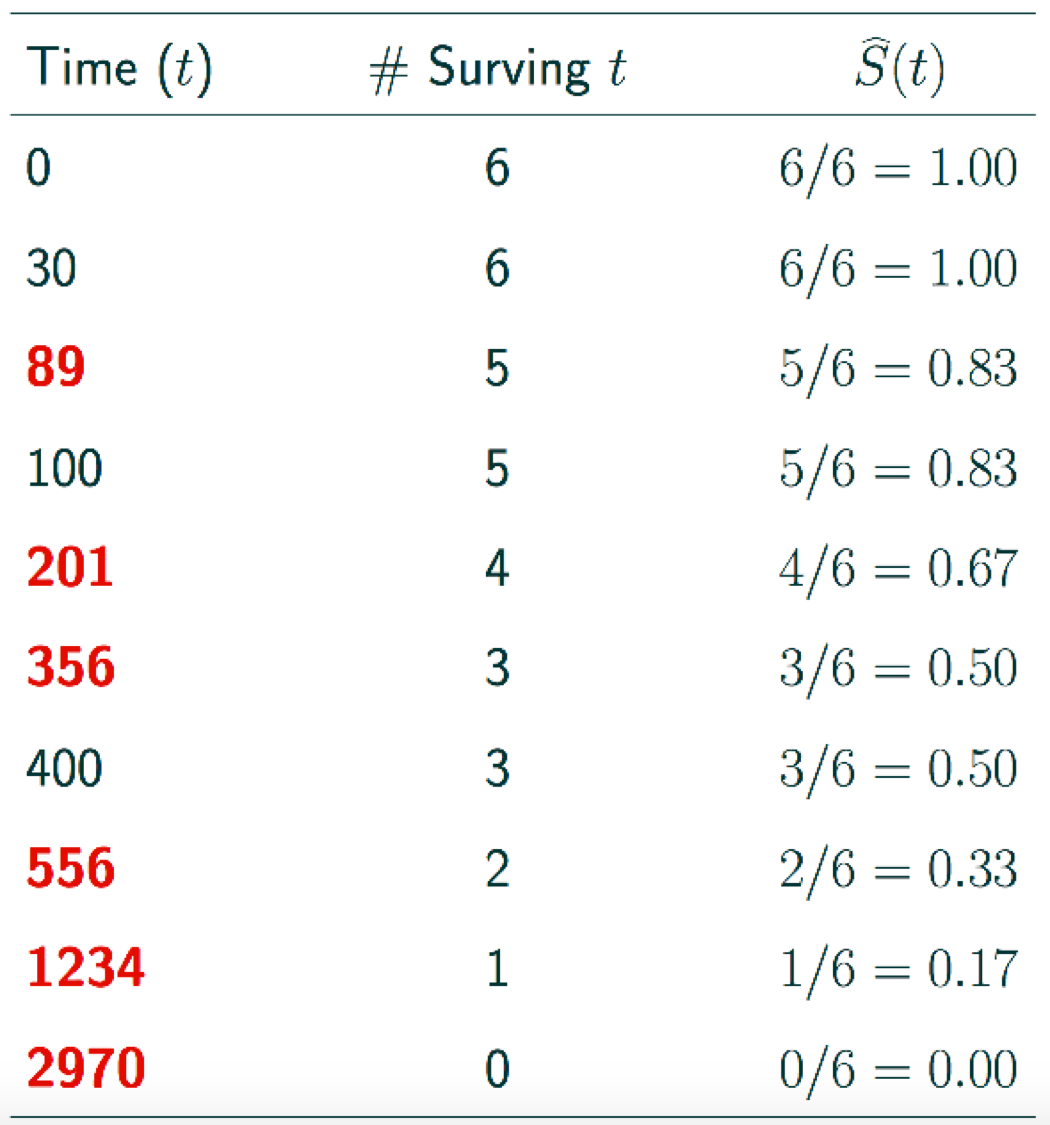

This can be graphically represented as shown below:

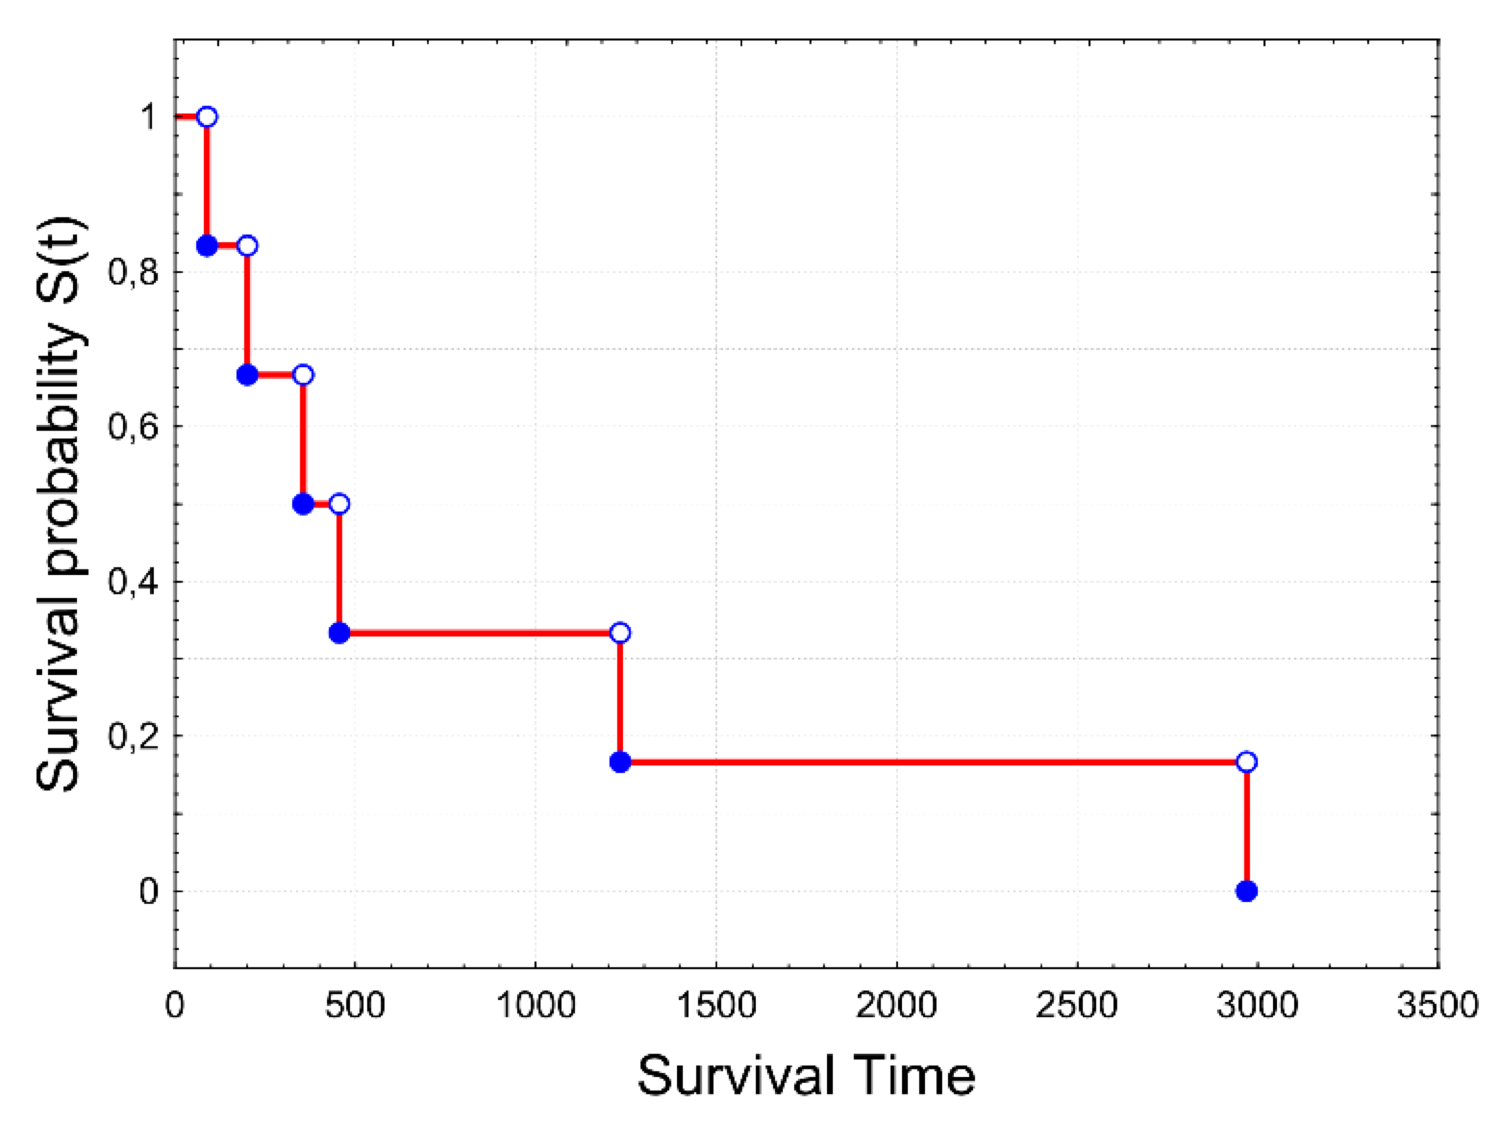

## 4. Cox Proportional Hazard Model

In Kaplan-Meier method, the survival analysis is based on the survival curve. We cannot use Kaplan-Meier method to estimate the impacts of a number of regressors on the survival time. For instance, if we were interested in estimating the effects of gender or age on the survival time, we would not be able to do that using Kaplan-Meier method. In Kaplan-Meier, we can only estimate the survival time for each group of patients (e.g. male vs females). Although we can visually inspect the survival times per group, but we don’t know if the survival times for each group are significantly different from each other (e.g. males experience the event sooner than females). In other words, Kaplan-Meier doesn’t help us answer how much more at risk one individual is than another. Similarly, it is not ideal when dealing with a continuous predictor.

To be able to study the effects of regressors on the survival time, we can use Cox Proportional Hazard model.

David Cox is an English statistician, and a renowned one at that. He has written over 300 papers and books on a variety of topics, has advised government, was knighted for his contribution to science, and holds numerous fellowships and awards. His paper introducing the proportional hazards assumption and inference for it, Regression Models & Life Tables, (1972, J. R. Stat. Soc. B, 34:187–220), has been cited over 12,000 times, according to Google Scholar.

Modeling of survival data usually employs the hazard function or the log hazard. For example, assuming a constant hazard, $h(t)=γ$, implies an exponential distribution of survival times, with density function $f(t)={γe}^{−γt}$.

As mentioned earlier, survival analysis typically examines the relationship of the survival distribution to covariates. Most commonly, this examination entails the specification of a linear-like model for the log hazard. For example, a parametric model based on the exponential distribution may be written as:

$log(hi(t))=α+β_1x_{i1}+β_2x_{i2}+···+β_kx_{ik}$
 

or, equivalently,

$hi(t)=exp(α+β_1x_{i1}+β_2x_{i2}+···+β_kx_{ik})$

that is, as a linear model for the log-hazard or as a multiplicative model for the hazard. Here, $i$ is a subscript for observation, and the $x$’s are the covariates. The constant $α$ in this model represents a kind of log-baseline hazard, since $loghi(t)=α$ (or $hi(t)=exp(α)$) when all of the $x$’s are zero. The Cox model leaves the baseline hazard function $α(t)=logh_0(t)$ unspecified:

$log(hi(t))=α(t)+β_1x_{i1}+β_2x_{i2}+···+β_kx_{ik}$

or, again equivalently,

$hi(t)=h_0(t)exp(β_1x_{i1}+β_2x_{i2}+···+β_kx_{ik})$

This model is semi-parametric because while the baseline hazard can take any form, the covariates enter the model linearly. Consider, now, two observations $i$ and $i’$ that differ in their $x$-values, with the corresponding linear predictors:

$η_i=β_1x_{i1}+β_2x_{i2}+···+β_kx_{ik}$

$η_{i′}=β_1x_{i′1}+β_2x_{i′2}+···+β_kx_{i′k}$

The hazard ratio for these two observations,

$\frac{h_i(t)}{h_i'(t)} = \frac{h_0(t)exp(η_i)}{h_0(t)exp(η_{i′})} = \frac{exp(η_i)}{exp(η_{i′})}$


is independent of time $t$. Consequently, the Cox model is a proportional-hazards model.

Remarkably, even though the baseline hazard is unspecified, the Cox model can still be estimated by the method of partial likelihood, developed by Cox (1972) in the same paper in which he introduced the Cox model. Although the resulting estimates are not as efficient as maximum-likelihood estimates for a correctly specified parametric hazard regression model, not having to make arbitrary, and possibly incorrect, assumptions about the form of the baseline hazard is a compensating virtue of Cox’s specification. Having fit the model, it is possible to extract an estimate of the baseline hazard.

## 5. Survival Analysis in Python

For the hands-on section, we will work on the data entitled “Worcester Heart Attack Study” which is available in University of Massachusetts-Amherst Data Repository. Let’s start with looking at the description of the data and the variables in the data:

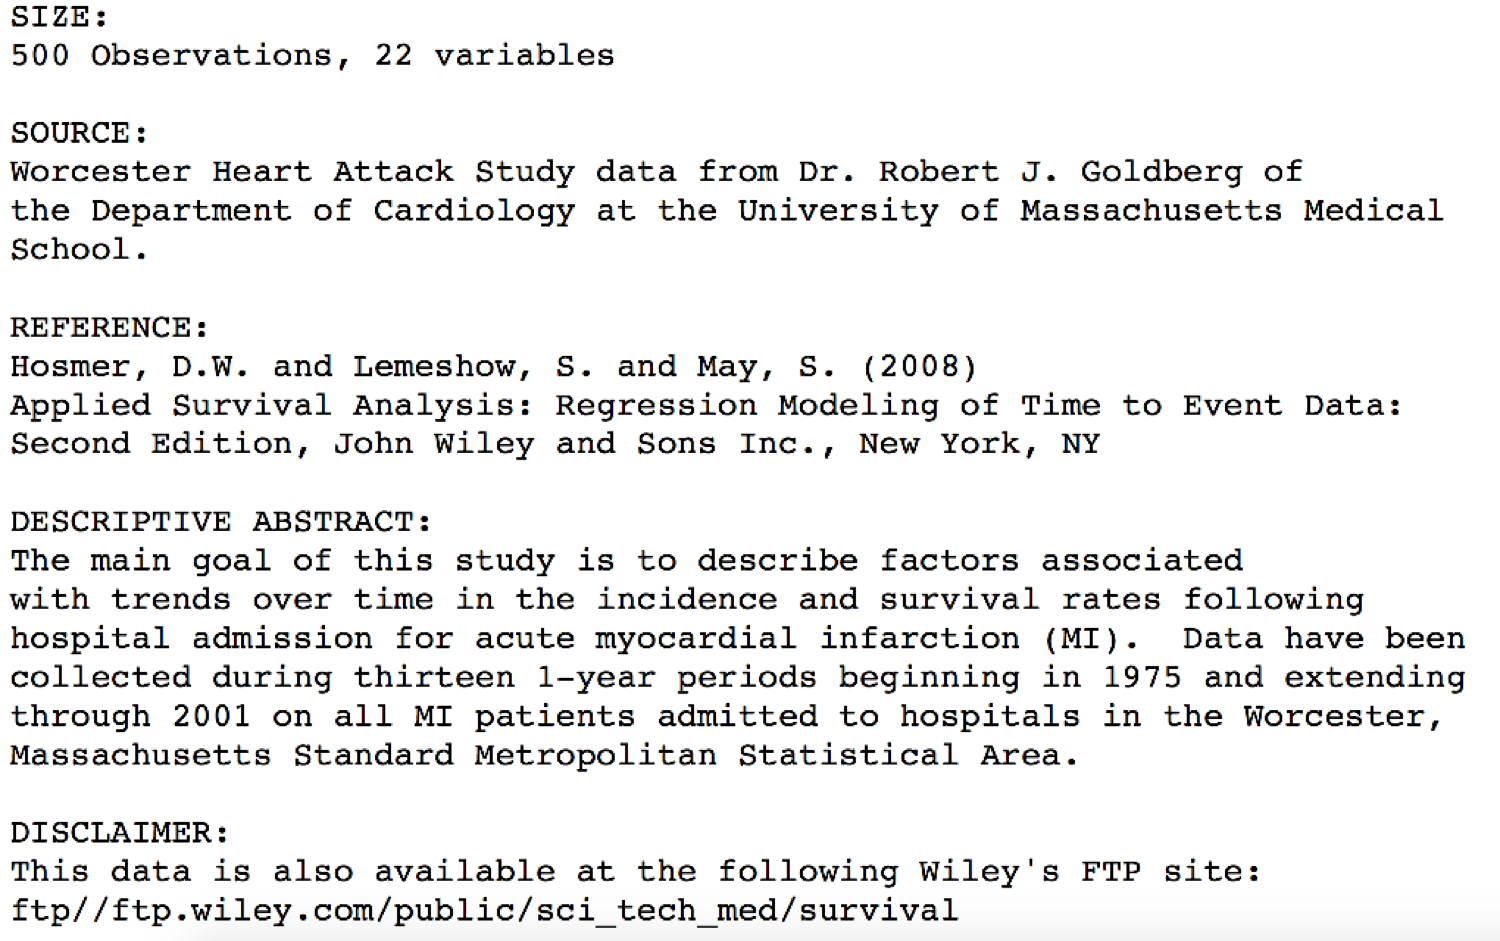
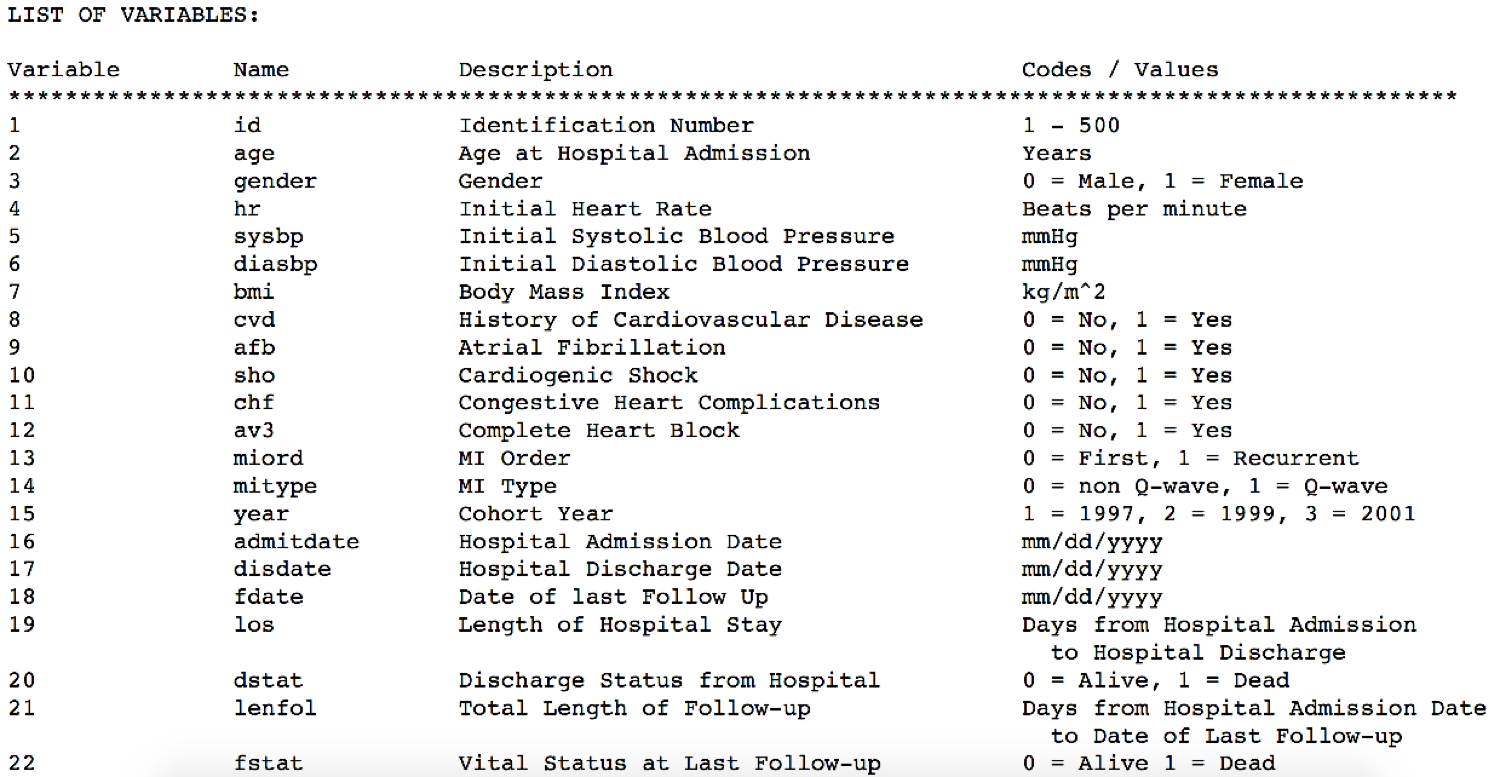

### 5.1. Notebook Styling and Library Installation

Run the next two cells to install and import the Python packages needed throughout the notebook. 

In [1]:
# !conda install -c sebp scikit-survival --yes 
# !pip install lifelines
!pip install xgbse

  Using cached xgbse-0.2.3-py3-none-any.whl (35 kB)


In [3]:
import numpy as np # Library for math operations
import pandas as pd # Library for data handling
from sksurv.nonparametric import kaplan_meier_estimator # Library for survival analysis
import matplotlib.pyplot as plt # Library for plotting
import seaborn as sns # Another library for plotting
plt.style.use('fivethirtyeight') # Set the styling to FiveThirtyEight setting.

### 5.2. Read & Process the Data

Let’s read the data using Pandas:

In [4]:
data = pd.read_csv("heart_attack.csv") # Read data into a data frame

data = data.dropna() # Delete null values (Drop missing data)
data = data[data.lenfol<2100] # Drop the observations from post study
data.head(3) # Display the first 3 rows of data

,id,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,...,miord,mitype,year,admitdate,disdate,fdate,los,dstat,lenfol,fstat
3,4,70,0,65,123,76,26.63187,1,0,0,...,0,1,1,2/17/97,2/27/97,12/11/97,10,0,297,1
5,6,70,0,76,83,54,23.24236,1,0,0,...,0,0,1,3/11/97,3/12/97,3/12/97,1,1,1,1
7,8,55,0,91,147,95,27.11609,1,0,0,...,0,1,1,1/11/97,1/15/97,2/15/01,4,0,1496,1


Now we would like to create the survival plot for all of the individuals in our data set. The two variables that we use to create the plot are *fstat* (whether the event took place or not) and *lenfol* (the day of last follow-up after the first admission to the hospital):

In [5]:
from sksurv.nonparametric import kaplan_meier_estimator # Load the necessary package

time, survival_prob = kaplan_meier_estimator(data.fstat.astype(bool), data["lenfol"]) # Create the plot objects

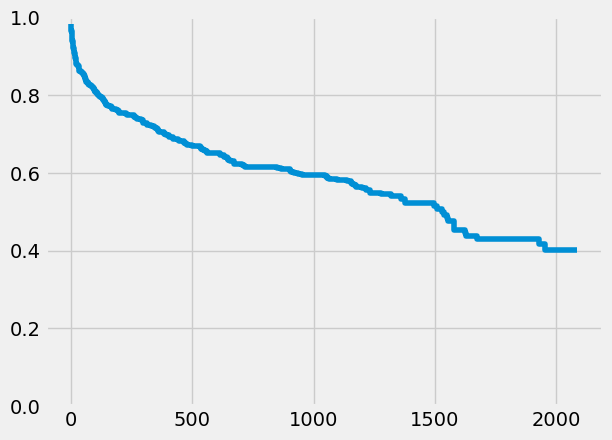

In [6]:
fig, ax = plt.subplots()
sns.lineplot(y = survival_prob, x=time, drawstyle='steps-post')
ax.set_ylim(0,1)
plt.show()

Let's check what is the survival rate after 507 days after the first addmission to the hospital:

In [8]:
adata = pd.DataFrame(zip(time, survival_prob)) # Put the time and survival columns in a dataframe
adata.columns = ['Time','Survival_Rate'] # Rename the columns of the dataframe
adata[adata['Time']==497] # Return the survival rate for time = 497 days

,Time,Survival_Rate
136,497,0.669899


Now let's go ahead and create two survival plots for each gender category in the data:

In [9]:
mdf = data[data.gender==0] # Male patients
fdf = data[data.gender==1] # Female patients

mtime, msurvival_prob = kaplan_meier_estimator(mdf.fstat.astype(bool), mdf["lenfol"])
ftime, fsurvival_prob = kaplan_meier_estimator(fdf.fstat.astype(bool), fdf["lenfol"])

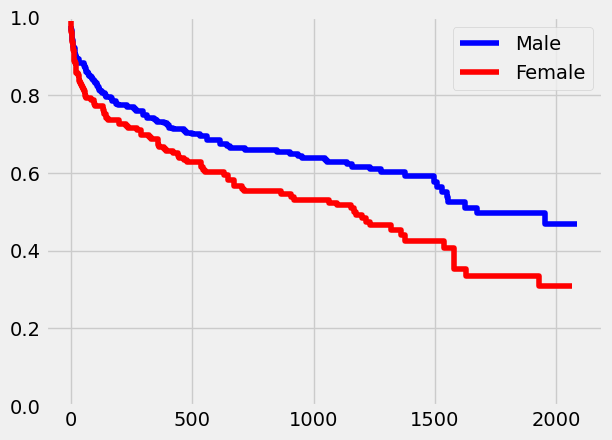

In [8]:
fig, ax = plt.subplots()
sns.lineplot(y = msurvival_prob, x=mtime, drawstyle='steps-post', color = "blue", label = "Male")
sns.lineplot(y = fsurvival_prob, x=ftime, drawstyle='steps-post', color = "red", label = "Female")
ax.set_ylim(0,1)
plt.show()

We can also get the survival rates for each specific time and gender:

In [9]:
mdata = pd.DataFrame(zip(mtime,msurvival_prob))
mdata.columns = ['Time','Survival_Rate']

fdata = pd.DataFrame(zip(ftime,fsurvival_prob))
fdata.columns = ['Time','Survival_Rate']

In [10]:
mdata[mdata['Time']==497] # Survival rate of male patients after 497 days

,Time,Survival_Rate
91,497,0.699287


In [11]:
fdata[fdata['Time']==497] # Survival rate of female patients after 497 days

,Time,Survival_Rate
65,497,0.626884


### 5.3. Kaplan-Meier Model

Now, we go ahead and fit the Kaplan-Meier model for each gender:

In [12]:
from lifelines import KaplanMeierFitter

mkmf = KaplanMeierFitter()
mkmf.fit(durations = mdf.lenfol, event_observed = mdf.fstat)

fkmf = KaplanMeierFitter()
fkmf.fit(durations = fdf.lenfol, event_observed = fdf.fstat)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 189 total observations, 88 right-censored observations>

In [13]:
mkmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,279,279
1.0,6,6,0,0,279
2.0,3,3,0,0,273
3.0,1,1,0,0,270
4.0,1,1,0,0,269
...,...,...,...,...,...
2065.0,1,0,1,0,5
2066.0,1,0,1,0,4
2083.0,1,0,1,0,3


In [14]:
mkmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.978495
2.0,0.967742
3.0,0.964158
4.0,0.960573
...,...
2065.0,0.469476
2066.0,0.469476
2083.0,0.469476


In [15]:
fkmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,189,189
1.0,2,2,0,0,189
2.0,5,5,0,0,187
3.0,2,2,0,0,182
4.0,1,1,0,0,180
...,...,...,...,...,...
1969.0,1,0,1,0,5
1979.0,1,0,1,0,4
2009.0,1,0,1,0,3


In [16]:
fkmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.989418
2.0,0.962963
3.0,0.952381
4.0,0.947090
...,...
1969.0,0.307974
1979.0,0.307974
2009.0,0.307974


In [17]:
mkmf.predict(500)

0.6992873277807862

In [18]:
fkmf.predict(500)

0.6268835684644865

### 5.4. Cox Proportional Hazard Model:

We can use the lifelines package to fit a Cox model:

In [7]:
from lifelines import CoxPHFitter

First, we split the data to train and test:

In [21]:
df = data[['gender','cvd','lenfol','fstat']].sample(frac=1,random_state=1)

train = df.head(350)
test = df.tail(118)

In the example below, we fit a simple Cox model using gender as the only covariate in the model:

In [22]:
cph = CoxPHFitter()   # Instantiate the class to create a cph object
cph.fit(train, 'lenfol', event_col='fstat')   # Fit the data to train the model
cph.print_summary()    # Have a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 350 total observations, 190 right-censored observations>
             duration col = 'lenfol'
                event col = 'fstat'
      baseline estimation = breslow
   number of observations = 350
number of events observed = 160
   partial log-likelihood = -856.54
         time fit was run = 2023-02-14 16:21:27 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
gender      0.44       1.55       0.16             0.13             0.75                 1.14                 2.12
cvd         0.21       1.23       0.19            -0.18             0.59                 0.84                 1.80

            cmp to    z    p   -log2(p)
covariate                              
gender        0.00 2.76 0.01       7.43
cvd           0.00 1.06 0.29       1.79
---
Concordance = 0.56
Partial AIC = 1717.07
log-likelihood ratio test = 9.54 on 2 df
-log2(p) of ll-ratio test = 6.88

In [23]:
# importing model and utils from xgbse
from xgbse.converters import convert_to_structured

# importing metrics
from xgbse.metrics import (
    concordance_index,
    approx_brier_score
)

test_Labels = convert_to_structured(test['lenfol'], test['fstat'])

pred = cph.predict_survival_function(test)

print(f'C-index: {concordance_index(test_Labels, pred.T)}')
print(f'Avg. Brier Score: {approx_brier_score(test_Labels, pred.T)}')

C-index: 0.5205314009661836
Avg. Brier Score: 0.20450946926589253


In [18]:
pred.T

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,10.0,11.0,14.0,...,2009.0,2025.0,2048.0,2057.0,2061.0,2064.0,2066.0,2083.0,2084.0,2086.0
39,0.987795,0.973161,0.970699,0.965781,0.960857,0.948599,0.936327,0.928923,0.921497,0.916517,...,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538
443,0.990058,0.978106,0.976093,0.972067,0.968032,0.957972,0.947876,0.941772,0.935642,0.931526,...,0.517027,0.517027,0.517027,0.517027,0.517027,0.517027,0.517027,0.517027,0.517027,0.517027
364,0.987795,0.973161,0.970699,0.965781,0.960857,0.948599,0.936327,0.928923,0.921497,0.916517,...,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538
102,0.981101,0.958611,0.954846,0.947341,0.939847,0.921285,0.902833,0.891765,0.880714,0.873330,...,0.283768,0.283768,0.283768,0.283768,0.283768,0.283768,0.283768,0.283768,0.283768,0.283768
232,0.987795,0.973161,0.970699,0.965781,0.960857,0.948599,0.936327,0.928923,0.921497,0.916517,...,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,0.987795,0.973161,0.970699,0.965781,0.960857,0.948599,0.936327,0.928923,0.921497,0.916517,...,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538
99,0.981101,0.958611,0.954846,0.947341,0.939847,0.921285,0.902833,0.891765,0.880714,0.873330,...,0.283768,0.283768,0.283768,0.283768,0.283768,0.283768,0.283768,0.283768,0.283768,0.283768
428,0.987795,0.973161,0.970699,0.965781,0.960857,0.948599,0.936327,0.928923,0.921497,0.916517,...,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538
267,0.987795,0.973161,0.970699,0.965781,0.960857,0.948599,0.936327,0.928923,0.921497,0.916517,...,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538,0.444538


The summary output gives information about the formula used for the Cox Regression Model. Also, it gives information about the sample; for instance the sample size in this example was 350 and the number of events were 160.

Similar to other regression outputs, Cox Regression output has beta coefficient, standard error, some statistics and P-value.

Cox Regression has additional column for exp(coef). The quantities exp(coef) are called hazard ratios (HR). A value of coef greater than zero, or equivalently a hazard ratio greater than one, indicates that as the value of the covariate increases, the event hazard increases and thus the length of survival decreases.

Put another way, a hazard ratio (which is reported as exp(coef)) above 1 indicates that a covariate is positively associated with the event probability, and thus negatively associated with the length of survival.

In summary,

* HR = 1: No effect
* HR < 1: Reduction in the hazard
* HR > 1: Increase in Hazard

Similar to Logistic Regression, the way we interpret exp(coef) depends on the variable type it belongs to. For instance, for variable gender, exp(coef) is equal to 1.55. This means that the hazard for female (gender = 1) patients at a given time t is 1.55 times more than the hazard for male (gender = 0) patients at time t. For numerical variables, exp(coef) means that the baseline hazard will increase by a factor of exp(coef) when the variable increases by one unit. 

For assessing Cox Regression Model, a few statistics are calculated and shown in the summary output.

Concordance index (c index, c statistic) is a measure of rank correlation between predicted scores and observed time points. The concordance shows fraction of pairs in the sample, where the observations with the higher survival time have the higher probability of survival predicted by the model. The higher the value of concordance, the better (more accurate) the model. For a set of illustrative examples about how concordance is calculated, please visit https://medium.com/analytics-vidhya/concordance-index-72298c11eac7

The value of the Brier score represents the average squared distances between the observed survival status and the predicted survival probability. It is always between 0.0 and 1.0, where a model with perfect skill has a score of 0.0 and the worst has a score of 1.0. However, it's hard to tell whether the model is good or bad if the Brier score hovers around the 0.5 mark.

To visualize the coefficient for each covariate, we can use the plot method:

<AxesSubplot:xlabel='log(HR) (95% CI)'>

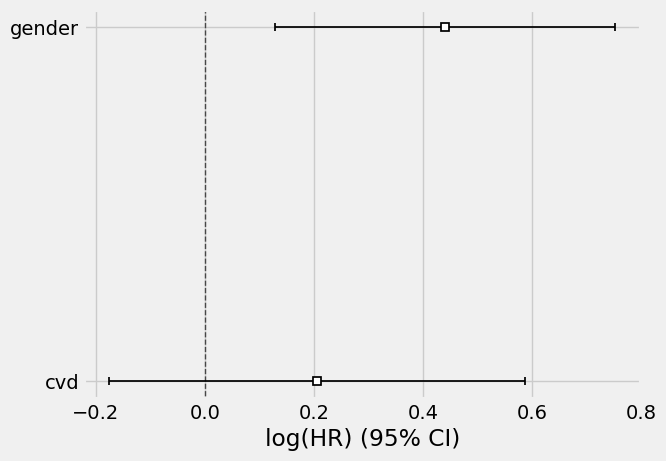

In [15]:
cph.plot()

To show that how cvd affects the survival prospects, we can keep gender fixed and compare the survival curves for different values of cvd:

In [16]:
pd.DataFrame({'gender': [0,0], 'cvd': [1,0]})

,gender,cvd
0,0,1
1,0,0


<AxesSubplot:>

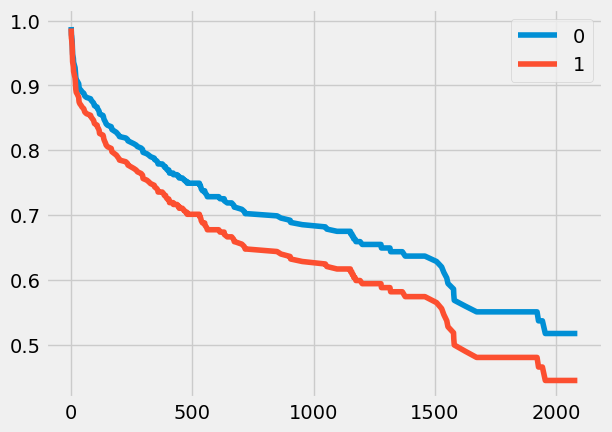

In [19]:
cph.predict_survival_function(pd.DataFrame({'gender': [0,0], 'cvd': [0,1]})).plot()

We can recreate the plot above but for females:

<AxesSubplot:>

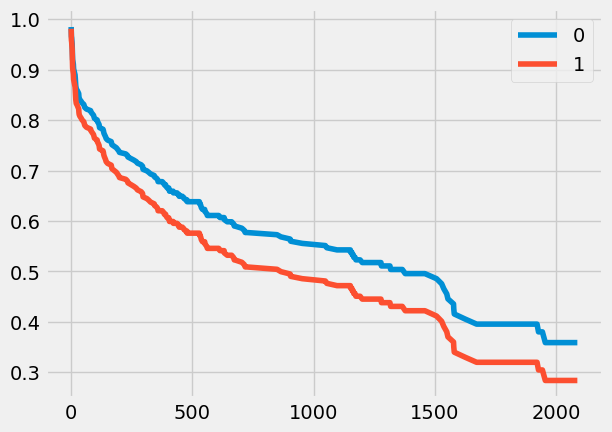

In [20]:
cph.predict_survival_function(pd.DataFrame({'gender': [1,1], 'cvd': [0,1]})).plot()

We can see that for both male and female patients, the survival curve associated with cvd = 1 is below the survival curve for cvd = 0. 

### 5.5 XGBoost Survival Model

In [4]:
data.shape

(468, 22)

In [21]:
from sklearn.preprocessing import MinMaxScaler

# importing model and utils from xgbse
from xgbse import (XGBSEKaplanNeighbors, 
                   XGBSEDebiasedBCE,
                   XGBSEKaplanTree,
                   XGBSEStackedWeibull,
                   XGBSEBootstrapEstimator)

from xgbse.converters import convert_to_structured

# importing metrics
from xgbse.metrics import (
    concordance_index,
    approx_brier_score,
    dist_calibration_score
)

df = data[['gender','age','lenfol','fstat']].sample(frac=1,random_state=1)

trainData = df[['gender','age']].head(350)
trainLabels = df[['lenfol','fstat']].head(350)
testData = df[['gender','age']].tail(118)
testLabels = df[['lenfol','fstat']].tail(118)

scaler = MinMaxScaler()

trainData = pd.DataFrame(scaler.fit_transform(trainData), 
                         columns=trainData.columns)

testData = pd.DataFrame(scaler.fit_transform(testData), 
                         columns=testData.columns)

X = trainData
y = convert_to_structured(trainLabels['lenfol'], trainLabels['fstat'])

X_val = testData
y_val = convert_to_structured(testLabels['lenfol'], testLabels['fstat'])

#### XGBSE Models

##### XGBSEKaplanNeighbors

In [9]:
# fitting xgbse model
xgbse_model = XGBSEKaplanNeighbors(n_neighbors=5)
xgbse_model.fit(X, y)

# predicting
preds = xgbse_model.predict(X_val)

# # running metrics
print(f'C-index: {concordance_index(y_val, preds)}')
print(f'Avg. Brier Score: {approx_brier_score(y_val, preds)}')

C-index: 0.6814009661835749
Avg. Brier Score: 0.23113535223126594


##### XGBSEDebiasedBCE

In [10]:
# fitting xgbse model
xgbse_model = XGBSEDebiasedBCE()
xgbse_model.fit(X, y)

# predicting
preds = xgbse_model.predict(X_val)

# # running metrics
print(f'C-index: {concordance_index(y_val, preds)}')
print(f'Avg. Brier Score: {approx_brier_score(y_val, preds)}')

C-index: 0.7352657004830918
Avg. Brier Score: 0.18321948070786312


##### XGBSEKaplanTree

In [11]:
# fitting xgbse model
xgbse_model = XGBSEKaplanTree()
xgbse_model.fit(X, y)

# predicting
preds = xgbse_model.predict(X_val)

# # running metrics
print(f'C-index: {concordance_index(y_val, preds)}')
print(f'Avg. Brier Score: {approx_brier_score(y_val, preds)}')

C-index: 0.7091787439613526
Avg. Brier Score: 0.1736753114227523


##### XGBSEStackedWeibull

In [12]:
# fitting xgbse model
xgbse_model = XGBSEStackedWeibull()
xgbse_model.fit(X, y)

# predicting
preds = xgbse_model.predict(X_val)

# # running metrics
print(f'C-index: {concordance_index(y_val, preds)}')
print(f'Avg. Brier Score: {approx_brier_score(y_val, preds)}')

C-index: 0.7214975845410628
Avg. Brier Score: 0.17993194761090955


##### XGBSEBootstrapEstimator

In [13]:
# fitting xgbse model

base = XGBSEDebiasedBCE()
xgbse_model = XGBSEBootstrapEstimator(base_estimator = base,
                                      n_estimators = 5,
                                      random_state = 1)
xgbse_model.fit(X, y)

# predicting
preds = xgbse_model.predict(X_val)

# # running metrics
print(f'C-index: {concordance_index(y_val, preds)}')
print(f'Avg. Brier Score: {approx_brier_score(y_val, preds)}')

/opt/conda/lib/python3.10/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class found in a time bucket
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgbse/_debiased_bce.py:286: RuntimeWarning: Warning: Only one class foun

C-index: 0.7420289855072464
Avg. Brier Score: 0.18815723671070203


## References:

http://www.stat.columbia.edu/~madigan/W2025/notes/survival.pdf

http://socserv.mcmaster.ca/jfox/Courses/soc761/survival-analysis.pdf

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/

https://github.com/sachsmc/ggkm

https://cran.r-project.org/web/views/Survival.html

https://socserv.socsci.mcmaster.ca/jfox/Books/Companion-1E/appendix-cox-regression.pdf

http://data.princeton.edu/wws509/notes/c7.pdf

https://github.com/loft-br/xgboost-survival-embeddings

https://github.com/loft-br/xgboost-survival-embeddings/blob/main/examples/how_xgbse_works.ipynb

## Other cases:

https://www.ft.com/content/e3561cd0-dd11-11e3-8546-00144feabdc0#axzz379YlWyVX
    
https://www.aihr.com/blog/applying-survival-analysis-reduce-employee-turnover-practical-case/